In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" 1directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

files = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        files.append(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [70]:
train_df = pd.read_csv(files[0])

### Columns in the data set

In [71]:
for col in train_df.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [72]:
train_df_num = train_df.drop(["PassengerId","Name","SibSp","Ticket","Cabin"],axis = 1,inplace = False)

In [73]:
train_df_num

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S
887,1,1,female,19.0,0,30.0000,S
888,0,3,female,NaN,2,23.4500,S
889,1,1,male,26.0,0,30.0000,C


In [84]:
train_df_num_encoded = pd.get_dummies(train_df_num,columns = ["Sex","Embarked"]).drop(["Sex_male"], axis = 1)


<Axes: >

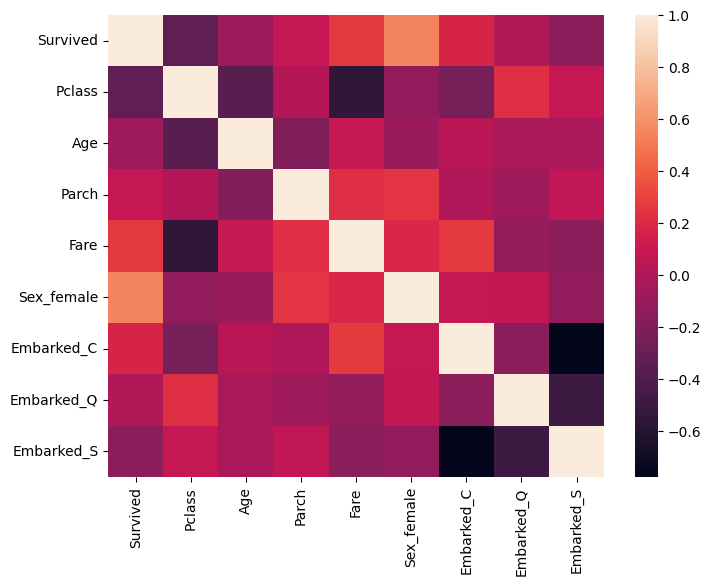

In [95]:
corrmat = train_df_num_encoded.corr()
f, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corrmat)

In [98]:
k = 4
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(train_df_num_encoded[cols].values)

,Survived,Pclass,Age,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.077221,0.081629,0.257307,0.543351,0.168240,0.003650,-0.155660
Sex_female,0.543351,-0.131900,-0.093254,0.245489,0.182333,1.000000,0.082853,0.074115,-0.125722
Fare,0.257307,-0.549500,0.096067,0.216225,1.000000,0.182333,0.269335,-0.117216,-0.166603
Embarked_C,0.168240,-0.243292,0.036261,-0.011069,0.269335,0.082853,1.000000,-0.148258,-0.778359
